<a href="https://colab.research.google.com/github/yuji-sgs/web-optimization/blob/main/cahpter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1章: A/Bテストからはじめよう: ベイズ統計による仮説検定入門

In [1]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-1-973520a4796b>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<function matplotlib.pyplot.show(close=None, block=None)>

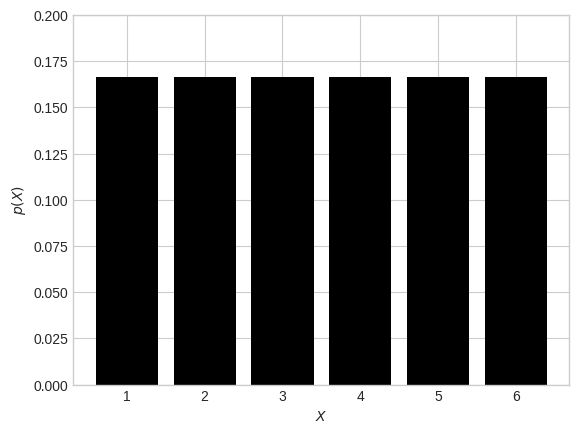

In [7]:
# 理想的なサイコロの各面が出る確率
xs = [i+1 for i in range(6)]
ps = [1./6 for x in xs]
plt.ylim(0, 0.2)
plt.xlabel(r'$X$')
plt.ylabel(r'$p(X)$')
plt.bar(xs, ps)
plt.show

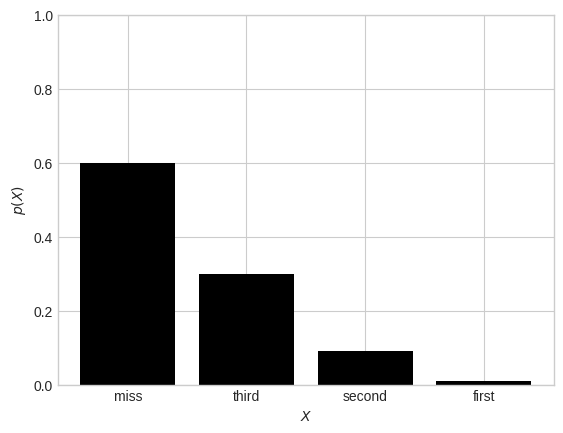

In [11]:
# 福引で各賞が出る確率分布の例
xs = ['miss', 'third', 'second', 'first']
ps = [0.6, 0.3, 0.09, 0.01]
plt.ylim(0, 1)
plt.xlabel(r'$X$')
plt.ylabel(r'$p(X)$')
plt.bar(xs, ps)
plt.show()

### 離散地の確率分布

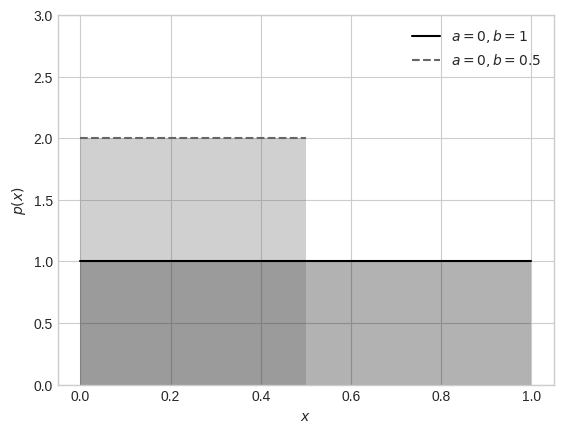

In [13]:
plt.plot([0, 1], [1, 1], label=r'$a=0, b=1$')
plt.plot([0, 0.5], [2, 2], label=r'$a=0, b=0.5$', linestyle='--')
plt.ylim(0, 3)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.fill_between([0, 1], [1, 1], alpha=0.3)
plt.fill_between([0, 0.5], [2, 2], alpha=0.3)
plt.legend()
plt.show()

### 離散化による確率密度関数の近似

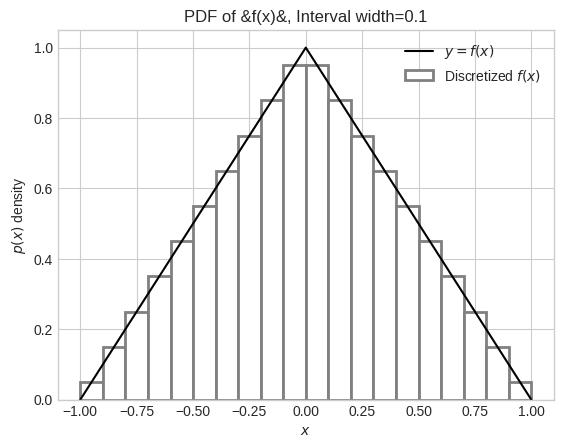

In [17]:
# 確率密度関数𝑓(𝑥)と、離散化によって近似した関数。
step = 0.1

f = lambda x: x+1 if x < 0 else -x+1
xs = np.linspace(-1, 1, 21)
plt.plot(xs, [f(x) for x in xs], label=r'$y = f(x)$')

xss = (xs + step/2)[:-1]
fs = [f(x) for x in xss]
plt.bar(xss, fs, width=step, color='white', edgecolor='gray', label=r'Discretized $f(x)$', linewidth=2)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$ density')
plt.legend()
plt.title('PDF of &f(x)&, Interval width=%.1f' % (2/20))
plt.show()

Text(0.5, 1.0, 'PMF approximation of $f(x)$, Interval width=0.1')

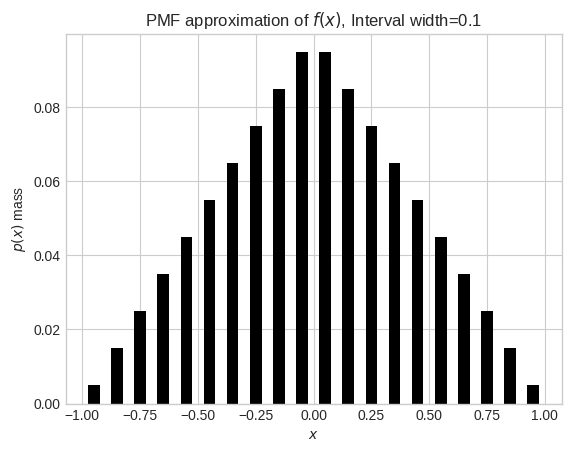

In [22]:
# 𝑓(𝑥)を確率質量関数で近似した結果
step = 0.1
f = lambda x: x + 1 if x < 0 else -x + 1
xs = np.linspace(-1, 1, 21)
xss = (xs + step/2)[:-1]
fs = [f(x) for x in xss]

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$ mass')
plt.bar(xss, fs / sum(fs), width=0.05, linewidth=0)
plt.title('PMF approximation of $f(x)$, Interval width=%.1f'% (2/20))

### ベイズの定理を使ったクリック率の推論

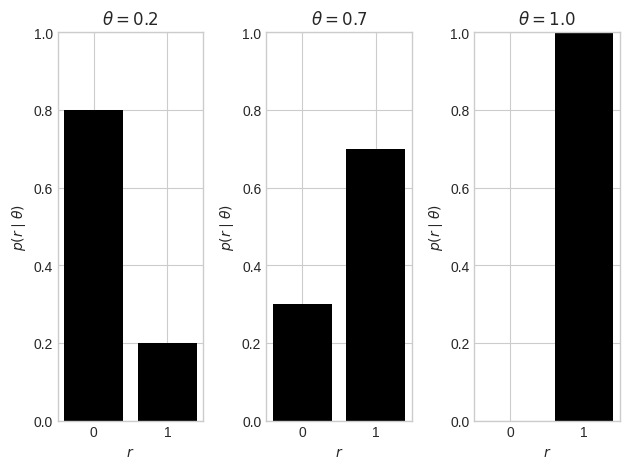

In [3]:
# さまざまなベルヌーイ分布の例
plt.subplot(1, 3, 1)
theta = 0.2
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])

plt.subplot(1, 3, 2)
theta = 0.7
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])

plt.subplot(1, 3, 3)
theta = 1
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])
plt.tight_layout()

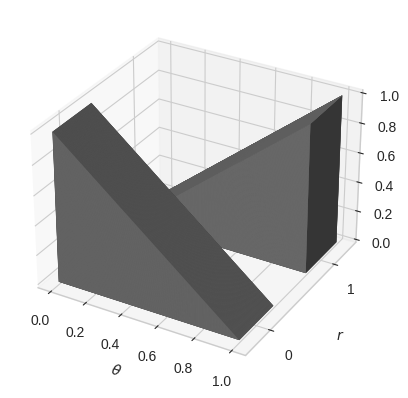

In [4]:
# ベルヌーイ分布の3D表現
steps = 1000
thetas = np.linspace(0, 1, steps)
rs = [0, 1]
p = lambda theta, r: (theta ** r) * ((1 - theta) ** (1 - r))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = []
y = []
z = []
for theta in thetas:
  for r in rs:
    x.append(theta)
    y.append(r - 0.25)
    z.append(p(theta, r))
ax.bar3d(x, y, 0, 1/steps, 0.5, z, color='gray', shade=True)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('$r$')
ax.set_yticks([0, 1])
plt.show()